<a href="https://colab.research.google.com/github/Deep-Dey1/FUN-PIANO/blob/main/lab_5_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Design and implement a CNN model (with 2 layers of convolutions) to classify multi category image datasets. Record the accuracy corresponding to the number of epochs. Use the MNIST, CIFAR-10 datasets

In [1]:
! pip install tensorflow matplotlib numpy


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9038 - loss: 0.3172 - val_accuracy: 0.9841 - val_loss: 0.0436
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9848 - loss: 0.0501 - val_accuracy: 0.9873 - val_loss: 0.0423
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9902 - loss: 0.0311 - val_accuracy: 0.9887 - val_loss: 0.0323
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9932 - loss: 0.0216 - val_accuracy: 0.9896 - val_loss: 0.0313
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9946 - loss: 0.0171 - val_accuracy: 0.9876 - val_loss: 0.0374
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9964 - loss: 0.0102 - val_accuracy: 0.9893 - val_loss: 0.0353
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9964 - loss: 0.0101 - val_accuracy: 0.9906 - val_loss: 0.0285
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9976 - loss: 0.0076

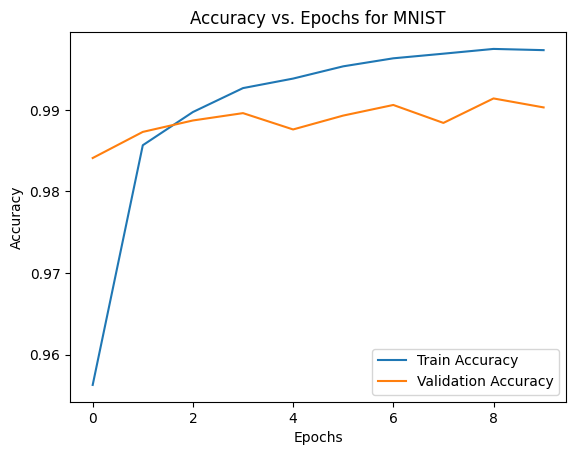

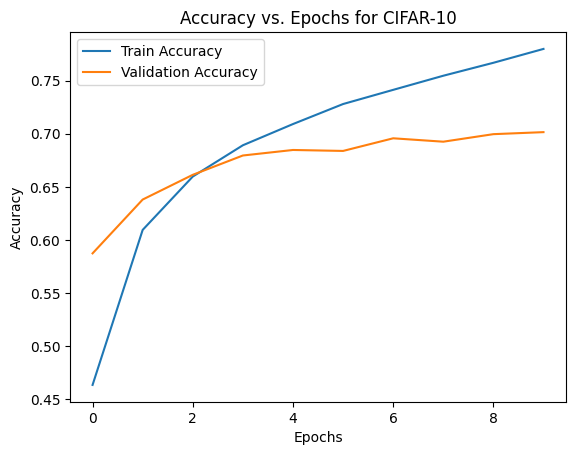

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()
x_train_mnist, x_test_mnist = x_train_mnist / 255.0, x_test_mnist / 255.0

# Reshape MNIST images to (28,28,1) for CNN input
x_train_mnist = x_train_mnist.reshape(-1, 28, 28, 1)
x_test_mnist = x_test_mnist.reshape(-1, 28, 28, 1)

# Load CIFAR-10 dataset
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = tf.keras.datasets.cifar10.load_data()
x_train_cifar, x_test_cifar = x_train_cifar / 255.0, x_test_cifar / 255.0

# Define CNN model
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train and evaluate on MNIST
epochs = 10
mnist_model = create_cnn_model((28, 28, 1), 10)
history_mnist = mnist_model.fit(x_train_mnist, y_train_mnist, epochs=epochs, validation_data=(x_test_mnist, y_test_mnist))

# Train and evaluate on CIFAR-10
cifar_model = create_cnn_model((32, 32, 3), 10)
history_cifar = cifar_model.fit(x_train_cifar, y_train_cifar, epochs=epochs, validation_data=(x_test_cifar, y_test_cifar))

# Plot accuracy vs. epochs
def plot_accuracy(history, dataset_name):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs. Epochs for {dataset_name}')
    plt.legend()
    plt.show()

plot_accuracy(history_mnist, "MNIST")
plot_accuracy(history_cifar, "CIFAR-10")
